In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q -U watermark
!pip install -qq transformers
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

     |████████████████████████████████| 2.5MB 30.1MB/s 
     |████████████████████████████████| 3.3MB 49.7MB/s 
     |████████████████████████████████| 901kB 39.4MB/s 
Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.1.5
torch       : 1.9.0+cu102
transformers: 4.8.0



In [ ]:
#@title Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import json
import html

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Other Programming Files/redditors.csv')

In [ ]:
df.head()

,comment_karma,comments,created_utc,has_verified_email,is_bot,is_default_icon,is_gold,is_mod,post_karma,submissions,username
0,-7,"[{""body"":""By submitting to an independent, non...",1.467681e+09,True,True,True,False,False,1,"[{""created_utc"":1472950699,""num_comments"":0,""s...",BlackToLive
1,-5,"[{""body"":""Only 125? Why not 10?\nIslamic state...",1.431683e+09,False,True,True,False,False,1,"[{""created_utc"":1434699494,""num_comments"":0,""s...",FaurnFlamebreaker
2,-4,"[{""body"":""This is one of the best seal documen...",1.445054e+09,False,True,True,False,False,1,"[{""created_utc"":1445054371,""num_comments"":5,""s...",bill_jonson
3,0,[],1.431694e+09,False,True,True,False,False,1,"[{""created_utc"":1442389020,""num_comments"":0,""s...",PurebringerOghmagra
4,-2,"[{""body"":""Haha! That's exactly what me BFF and...",1.442424e+09,False,True,True,False,False,1,"[{""created_utc"":1443861740,""num_comments"":1,""s...",clawisma


In [ ]:
df.comments[0]

json_data = json.loads(df.comments[0])
print(json_data)

[{'body': 'By submitting to an independent, non-profit community, the authors volunteered on a Good Samaritan basis to spread wokeness', 'controversiality': 1, 'created_utc': 1467741509, 'gilded': 0, 'nest_level': 4, 'reply_delay': 1097, 'score': 0, 'subreddit': 'politics'}, {'body': "Sorry, but if you bothered to read the article below the video you could've gotten the point", 'controversiality': 0, 'created_utc': 1467740879, 'gilded': 0, 'nest_level': 2, 'reply_delay': 819, 'score': 0, 'subreddit': 'politics'}, {'body': 'That is not a personal blog', 'controversiality': 0, 'created_utc': 1467740272, 'gilded': 0, 'nest_level': 2, 'reply_delay': 144, 'score': -1, 'subreddit': 'politics'}]


In [ ]:
idx = 0

def combine_comments(comments):
  txt = ''
  json_data = json.loads(comments)
  for comment in json_data:
    txt += html.unescape(comment['body']) + ' '
  
  global idx
  print(idx, txt)
  # date_as_string = str(date_in_some_format)  # cast to string
  # year_as_string = date_in_some_format[-4:] # last four characters
  # return int(year_as_string)
  idx += 1
  return txt

df['comments'] = df['comments'].apply(combine_comments)

Streaming output truncated to the last 5000 lines.

* Yes, we have no idea what the game will be, but in my opinion any theme is better then the default one (that lets be honest, looks like someone looked at hospital interior designs while designing it)


My politically correct answer:

If most of the subscribers feel that default is better then i will remove it If i remember correctly, Firefly class ships are meant for cargo and have no weapons. I would rather take a Daedalus class X-304 with Asgard shields and plasma beam weapons ( and a bay full of X-302's equipped with nukes wouldn't hurt) xD No. a) i just don't see him wanting to be a mod b) i highly doubt that he would have time to be a mod c) which would you rather, notch coding 0x10^c or notch idling in r/0x10c? i only added him as a show of good faith. after people have chosen moderators to add i'm going to remove him anyway if you have spare time, could you do a simple "color correction" for the subreddit and while the color 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

Shop anything, anywhere and anytime. Concept to Complete the task and Get Paid. You can choose from and enjoy, the array of exclusive offers on  website. Take advantage of seasonal offers, promotions and much more.  Reliable  time to contribute into well-established Bounty program for $10M+ transaction volume in 2017 Loyalty Coins. 
7904 He had a proper cult feel to him when he played in front of fans, remember being in the Stretford End and everyone signing "Ighalo scores we're on the pitch" loved that Hahah Jesus is nowhere near mate Nothing to do with that goal but Bailly has to start our best defender when fit. Mate it freaks me out when people type shit like this how does that even come into someone's head to type like that They aren't playing that defensive😂 Wolves on the other hand Do Wolves ever try and win a game? Are you saying that sarcastically? Tbf needs to be stopped as the head injury Class promo tbf Hahaha made me laug

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
idx = 0

def combine_submissions(submissions):
  txt = ''
  json_data = json.loads(submissions)
  for submission in json_data:
    txt += html.unescape(submission['title']) + ' '
  
  global idx
  print(idx, txt)
  # date_as_string = str(date_in_some_format)  # cast to string
  # year_as_string = date_in_some_format[-4:] # last four characters
  # return int(year_as_string)
  idx += 1
  return txt

df['submissions'] = df['submissions'].apply(combine_submissions)

Streaming output truncated to the last 5000 lines.
5158 
5159 21[M4F] just looking to chat is all 21 [M4R] is anyone out there? 21 [M4R] It's my birthday! :) anyone come have a cchat or something sickkk 20 [M4F] I'm just looking for advice on something. 20[M4R] please just take my mind off tomorrow. 20[M4R] bad night. Need a chat 20[M4R] having a real shit night. Tell me a joke or something. 20 [M4R] hungover and watching Always Sunny. 20 [M4R] go on then.. Anyone else having a lazy day? 20 [M4R] not really in a good place right now. Could use a chat 20 [M4R] Bored, Blazed and in need of a chat 20 [M4R] it's 2am, fancy a chat as sleep is most probably not an option tonight 20 [M4R] chillin', Killin', like a villain. 20[M4R] can't remember last night, feel gross today. 20[M4R] lazy day today, keep me sane and have a chat! 20[M4R] lazy day today. Keep me sane and have a chat. 20[M4R] ye, why not. It's 5am, can't sleep and nobody to talk to. 20 [M4R] what's good 20 [M4F] I Really want to 

In [ ]:
print("~~~~Comment Example~~~~")
print(df.comments[8769])

print()
print("~~~~Submission Example~~~~")
print(df.submissions[10084])

~~~~Comment Example~~~~
I dont care if I see an advertisement.  It is me who has the right to rock the vote.  But i should decide not other people what is useful and what is nonuseful to me. Hopefully not. There's no reason to vote down things simply because of where or who they come from, votes should be based on the quality of what's there.

Poingnant! and well said!!! 

~~~~Submission Example~~~~
My boss is on Reddit... 


In [ ]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

# explode(df, ['comments'], fill_value='', preserve_index=True)

In [ ]:
df[df['has_verified_email'].isnull()]

,comment_karma,comments,created_utc,has_verified_email,is_bot,is_default_icon,is_gold,is_mod,post_karma,submissions,username
896,60,"Not smoking, prefer alcohol. I hope it won't ...",1.441762e+09,NaN,True,True,False,False,2646,"""My cat upon realising she was no longer livin...",ironzion17
900,1,Either hard or no at all. That's why they bot...,1.444880e+09,NaN,True,True,False,False,3391,Cats do not like fruit He's been here about a ...,kanyebreeze
917,1,There are some but heavily oppressed as I've r...,1.444879e+09,NaN,True,True,False,False,5237,"After fighting all afternoon, my dogs fell asl...",reggaebull
919,0,,1.441762e+09,NaN,True,True,False,False,5485,"""Savannah cat. It’s a cat that looks like a le...",deusexmachina112
963,370,I hope you didn’t serve that to anyone you res...,1.354425e+09,NaN,False,True,False,False,2474,PS3 chill sessions How much money did you bet/...,relaxandtaketokes
...,...,...,...,...,...,...,...,...,...,...,...
9175,1,"Okay, so I'm brand new to gray market trading....",1.423255e+09,NaN,False,True,False,False,1,,dvisic
9217,16,I feel like this should be on a dota2circlejer...,1.430431e+09,NaN,False,True,False,False,1,Amateur Tournaments Headset Recommendations? R...,huyster_sc
9255,0,His impressions are very impressive.,1.453329e+09,NaN,False,True,False,False,1,"Top 11 Vegan Restaurants in Salt Lake City, Utah",vegantiandra
9452,6,[( ͡° ͜ʖ ͡°) *Your Comment Has Been Euphorifie...,1.398792e+09,NaN,False,True,False,False,2,me irl,Euphorify


In [ ]:
# df = df[df['EPS'].notna()]
df = df.dropna().reset_index(drop=True)

In [ ]:
# df
# print(len(df.index))
df

,comment_karma,comments,created_utc,has_verified_email,is_bot,is_default_icon,is_gold,is_mod,post_karma,submissions,username
0,-7,"By submitting to an independent, non-profit co...",1.467681e+09,True,True,True,False,False,1,Cops really be trying hard to take non-black p...,BlackToLive
1,-5,Only 125? Why not 10?\nIslamic state has captu...,1.431683e+09,False,True,True,False,False,1,This maine coon of mine is way too shy,FaurnFlamebreaker
2,-4,This is one of the best seal documentaries i'v...,1.445054e+09,False,True,True,False,False,1,Terrifying Secrets of US Navy SEALs Special Fo...,bill_jonson
3,0,,1.431694e+09,False,True,True,False,False,1,Can you relate to this? My mom always said you...,PurebringerOghmagra
4,-2,Haha! That's exactly what me BFF and me will d...,1.442424e+09,False,True,True,False,False,1,BUT - Kids say the darnedest things about the ...,clawisma
...,...,...,...,...,...,...,...,...,...,...,...
10009,6,"I see some downsides to slowly ""convert"" peopl...",1.385611e+09,False,False,True,False,False,1,,someappels
10010,0,"Good, because I always ignore them. I hope the...",1.496510e+09,False,False,True,False,False,2,Religious based spiritual harassment,jesusisfake2
10011,2,"Thanks for the input, its appreciated I believ...",1.428655e+09,False,False,True,False,False,1,My mother (50 hates my wife (28) My wife hates...,H4ppychappy
10012,2363,You sure can! Give me just a moment and I'll P...,1.373857e+09,True,False,True,False,True,91,"[FST] Star Wand, Nook Miles, Many Fossils, DIY...",themosthandsomeface


In [ ]:
df["has_verified_email"] = df["has_verified_email"].astype(int)
df["is_bot"] = df["is_bot"].astype(int)
df["is_default_icon"] = df["is_default_icon"].astype(int)
df["is_gold"] = df["is_gold"].astype(int)
df["is_mod"] = df["is_mod"].astype(int)

df = df.drop(["created_utc"], axis = 1)
df = df.drop(["username"], axis = 1)

In [ ]:
df.head()

,comment_karma,comments,has_verified_email,is_bot,is_default_icon,is_gold,is_mod,post_karma,submissions
0,-7,"By submitting to an independent, non-profit co...",1,1,1,0,0,1,Cops really be trying hard to take non-black p...
1,-5,Only 125? Why not 10?\nIslamic state has captu...,0,1,1,0,0,1,This maine coon of mine is way too shy
2,-4,This is one of the best seal documentaries i'v...,0,1,1,0,0,1,Terrifying Secrets of US Navy SEALs Special Fo...
3,0,,0,1,1,0,0,1,Can you relate to this? My mom always said you...
4,-2,Haha! That's exactly what me BFF and me will d...,0,1,1,0,0,1,BUT - Kids say the darnedest things about the ...


In [ ]:
print(df[df['is_bot'] == True])
print(df[df['is_bot'] == False])

     comment_karma  ...                                        submissions
0               -7  ...  Cops really be trying hard to take non-black p...
1               -5  ...            This maine coon of mine is way too shy 
2               -4  ...  Terrifying Secrets of US Navy SEALs Special Fo...
3                0  ...  Can you relate to this? My mom always said you...
4               -2  ...  BUT - Kids say the darnedest things about the ...
..             ...  ...                                                ...
929          32373  ...  Guy Kawasaki talks about tokens How does Ties....
930             24  ...  This is what our leader's got to do! Next day....
931            146  ...  Meet 80-Year-Old South African Designer Respon...
932           3275  ...  Homeland Security to Compile Database of Journ...
933              0  ...  The Man who upvotes everything When you dead b...

[934 rows x 9 columns]
       comment_karma  ...                                        submissions

In [ ]:
print(df.shape)
print(df.info())

(10014, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment_karma       10014 non-null  int64 
 1   comments            10014 non-null  object
 2   has_verified_email  10014 non-null  int64 
 3   is_bot              10014 non-null  int64 
 4   is_default_icon     10014 non-null  int64 
 5   is_gold             10014 non-null  int64 
 6   is_mod              10014 non-null  int64 
 7   post_karma          10014 non-null  int64 
 8   submissions         10014 non-null  object
dtypes: int64(7), object(2)
memory usage: 704.2+ KB
None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


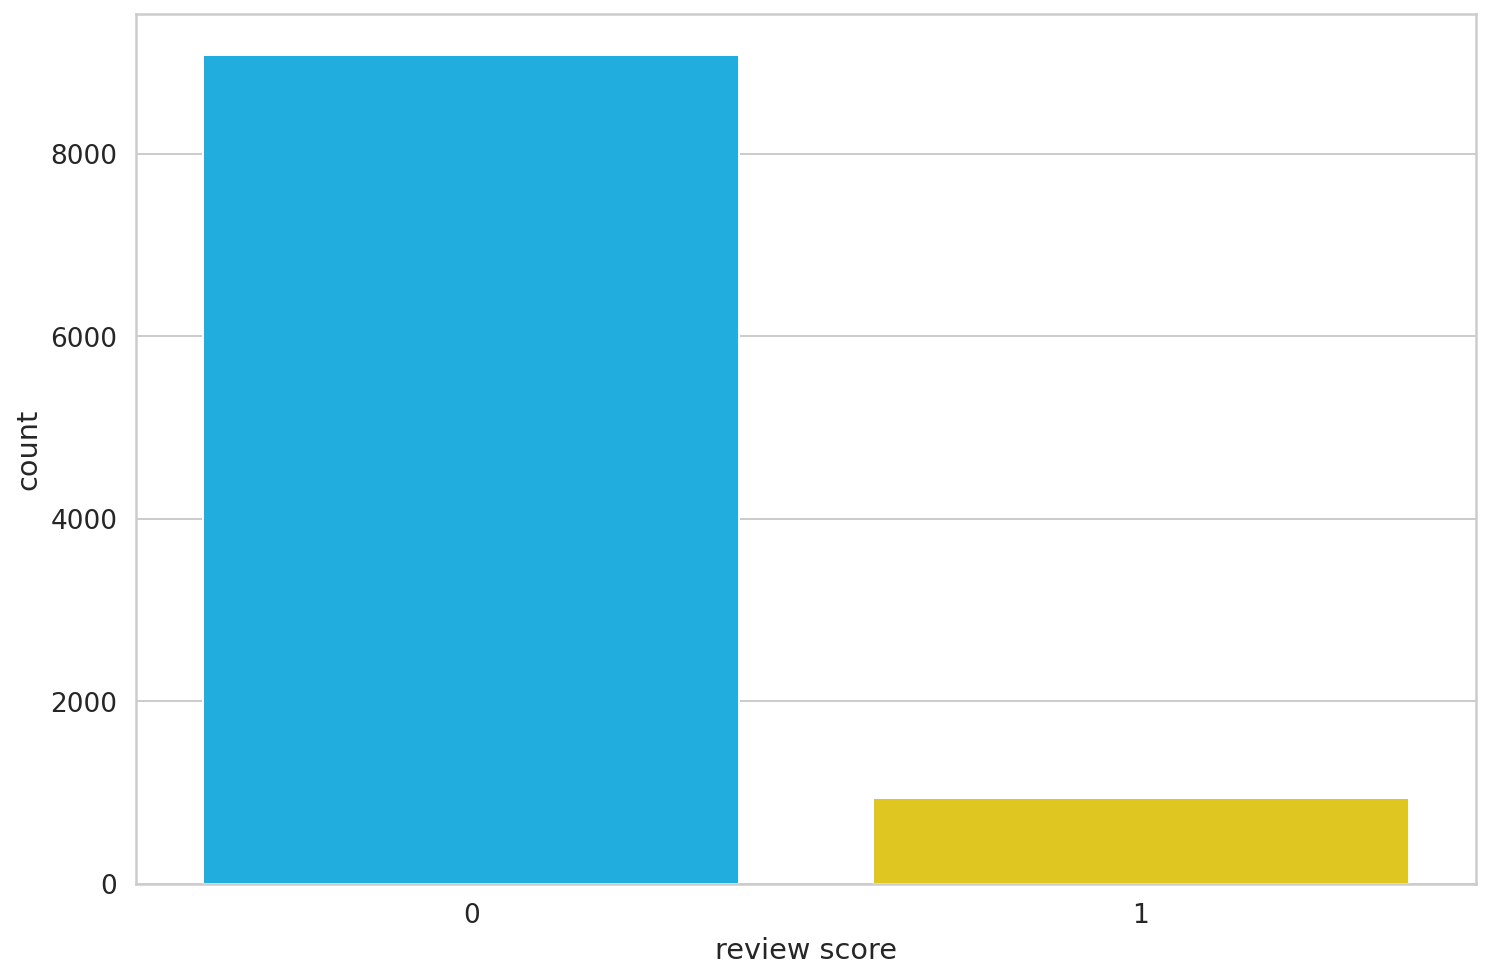

In [ ]:
sns.countplot(df.is_bot)
plt.xlabel('review score');

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


In [ ]:
sample_txt = df.comments[8769]
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Holding on to the back of the prostitute's head Have you gone back to Mexico? According to a comment in this thread there have been some people on the cock while on the clock. Physical air conditioning units. The sword-sharp edge of the one in my dorm has fucked my thigh in the ass so many times. My grandmother once told me that when she lived in the country as a child, her parents would make her and her siblings put their cat's kittens into a sack and throw them into the river. They were rather poor then and she said she never understood exactly what they were doing until she moved to the city.  [This one made me shrink into my seat a little.](https://yt3.ggpht.com/-Z151q4ECyeA/AAAAAAAAAAI/AAAAAAAAAAA/9JyKTQRwQ9M/s900-c-k-no/photo.jpg) Students *actually going to class*. That if I can't "get over someone" or "something" then I didn't have to try and force myself to make that happen immediately *just because* someone else told me that I should. I realized that it's not somet

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

32


['[CLS]',
 'Holding',
 'on',
 'to',
 'the',
 'back',
 'of',
 'the',
 'prostitute',
 "'",
 's',
 'head',
 'Have',
 'you',
 'gone',
 'back',
 'to',
 'Mexico',
 '?',
 'According',
 'to',
 'a',
 'comment',
 'in',
 'this',
 'thread',
 'there',
 'have',
 'been',
 'some',
 'people',
 '[SEP]']

In [ ]:
comment_token_lens = []

for txt in df.comments:
  tokens = tokenizer.encode(txt, max_length=512)
  comment_token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


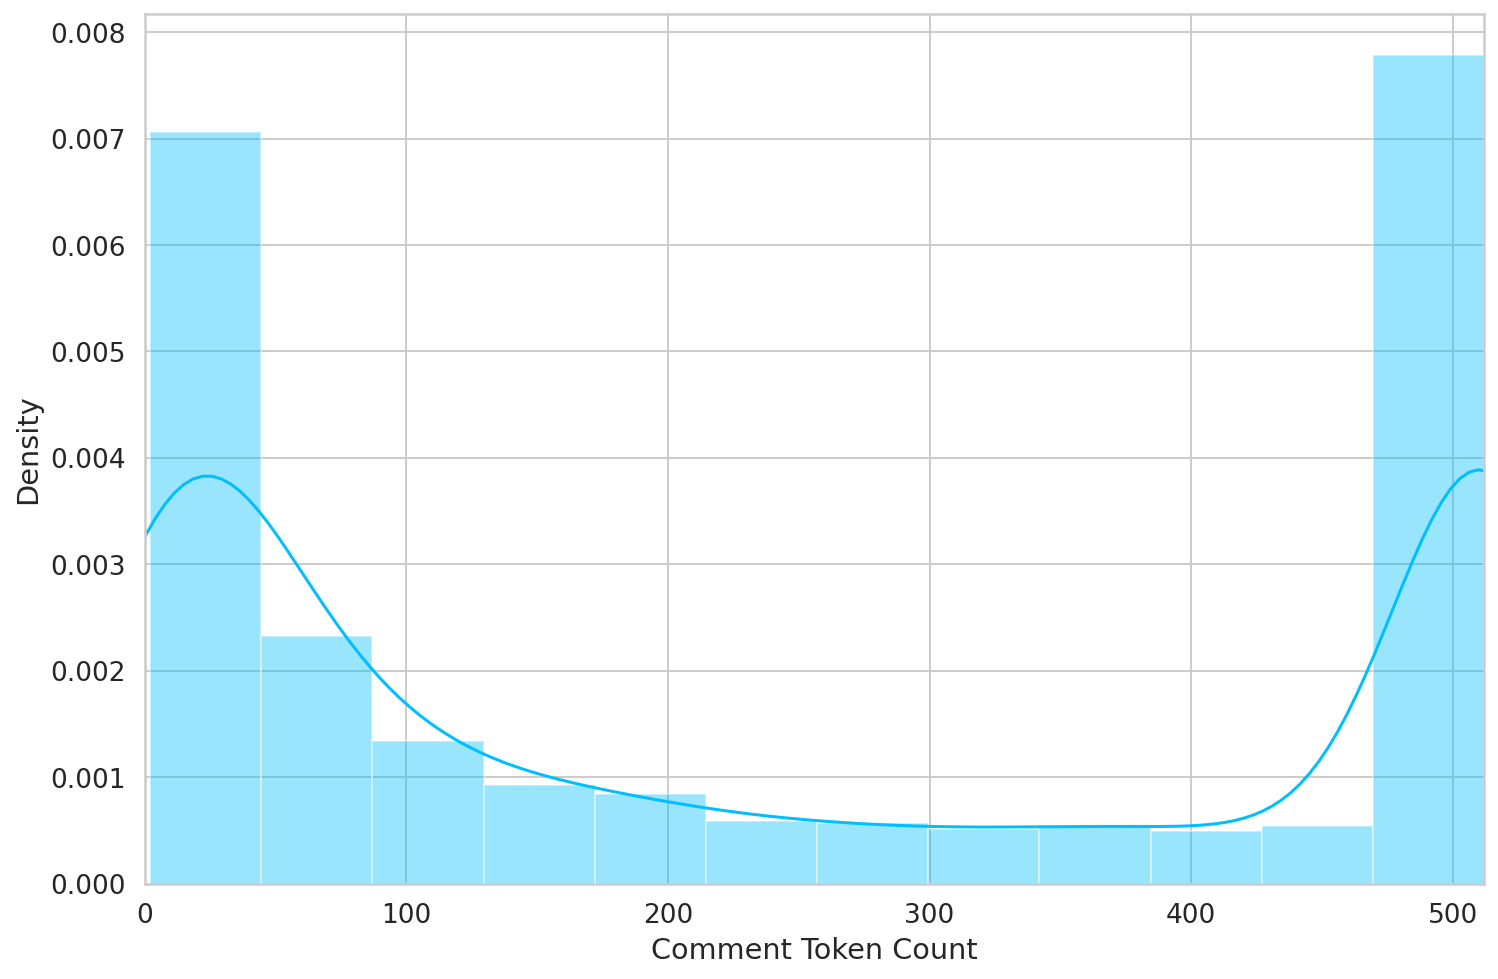

In [ ]:
sns.distplot(comment_token_lens)
plt.xlim([0, 512]);
plt.xlabel('Comment Token Count');

In [ ]:
submission_token_lens = []

for txt in df.submissions:
  tokens = tokenizer.encode(txt, max_length=512)
  submission_token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


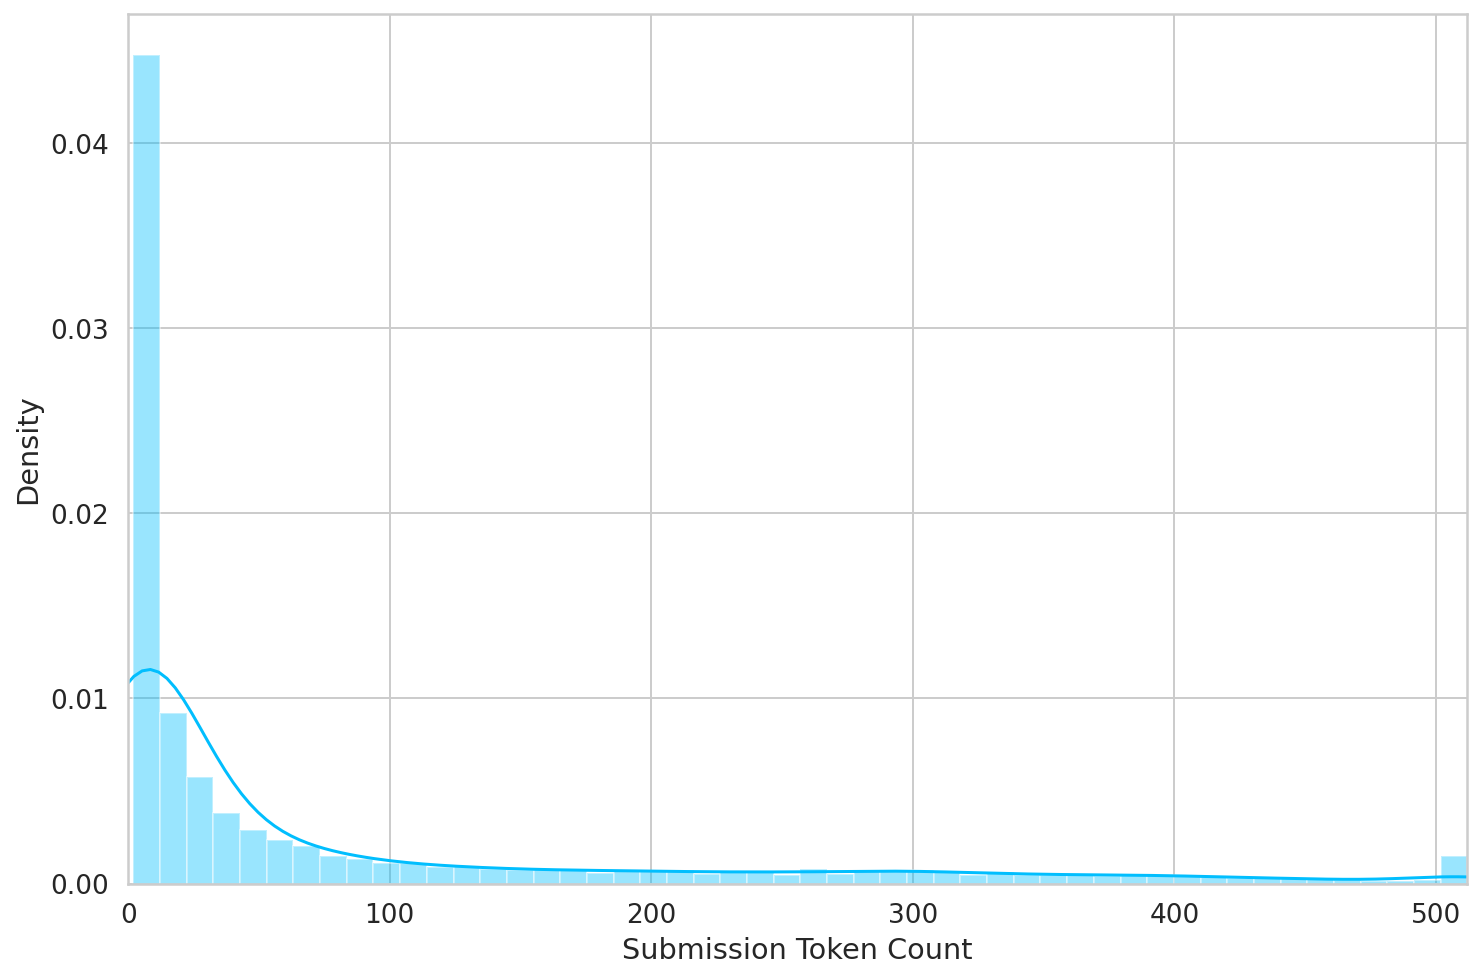

In [ ]:
sns.distplot(submission_token_lens)
plt.xlim([0, 512]);
plt.xlabel('Submission Token Count');

In [ ]:
MAX_LEN = 160

In [ ]:
class botData(Dataset):

  def __init__(self, comments, submissions, numerical_data, targets, tokenizer, max_len):
    self.comments = comments
    self.submissions = submissions
    self.x = numerical_data

    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.comments)
  
  def __getitem__(self, idx):
    comments = str(self.comments[idx])
    submissions = str(self.submissions[idx])
    x = self.x[idx]
    target = self.targets[idx]

    encoding = self.tokenizer.encode_plus(
      comments,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'comment_text': comments,
      'x': torch.tensor(x, dtype=torch.float),
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((9012, 9), (501, 9), (501, 9))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = botData(
    comments=df.comments.to_numpy(),
    submissions=df.submissions.to_numpy(),
    numerical_data=np.concatenate((np.concatenate((df.iloc[:,0:1].values, df.iloc[:,2:3].values), axis = 1), df.iloc[:,4:8].values), axis = 1),
    targets=df.is_bot.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
print(np.concatenate((df.iloc[:,0:1].values, df.iloc[:,2:8].values), axis = 1))

print(df.is_bot.to_numpy())

print(df.iloc[:,0:1])

[[  -7    1    1 ...    0    0    1]
 [  -5    0    1 ...    0    0    1]
 [  -4    0    1 ...    0    0    1]
 ...
 [   2    0    0 ...    0    0    1]
 [2363    1    0 ...    0    1   91]
 [   0    0    0 ...    0    0    1]]
[1 1 1 ... 0 0 0]
       comment_karma
0                 -7
1                 -5
2                 -4
3                  0
4                 -2
...              ...
10009              6
10010              0
10011              2
10012           2363
10013              0

[10014 rows x 1 columns]


In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

dict_keys(['comment_text', 'x', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
pooled_output.last_hidden_state
pooled_output.last_hidden_state.shape

torch.Size([1, 32, 768])

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.linear = nn.Linear(6, self.bert.config.hidden_size)
    self.out = nn.Linear(self.bert.config.hidden_size * 2, 2)
  
  def forward(self, x, input_ids, attention_mask):
    pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    comments_output = self.drop(pooled_output.pooler_output)
    x_output = self.linear(x)
    output = torch.cat((comments_output, x_output), 1)
    return self.out(output)

In [ ]:
model = SentimentClassifier()
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
x = data['x'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [ ]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

print(input.shape)
print(output.shape)

torch.Size([2, 3])
torch.Size([2, 3])


In [ ]:
print(F.softmax(model(x, input_ids, attention_mask), dim=1).shape)
print(model(x, input_ids, attention_mask))
print(torch.nn.functional.softmax(model(x, input_ids, attention_mask), dim=1).shape)

torch.Size([16, 2])
tensor([[ 1.3422e+02,  8.2958e+00],
        [-3.9399e-01,  4.8494e-01],
        [-1.1704e+00, -1.6877e+00],
        [ 1.0202e-01,  3.1108e-01],
        [ 5.0423e+00,  1.2154e+00],
        [ 4.2619e-01,  1.3796e-01],
        [ 1.0540e+02,  1.6320e+01],
        [ 4.3918e-01, -3.4511e-01],
        [ 2.2783e-01,  6.3972e-02],
        [ 8.8902e+01, -3.0602e+03],
        [ 4.5167e+00,  5.6862e-01],
        [ 5.0945e+00,  8.2020e-01],
        [ 2.1419e-01, -2.0971e-01],
        [ 6.0007e-01,  4.0832e-01],
        [ 1.4854e+02, -2.0272e+02],
        [ 3.8017e-01,  2.9056e-01]], device='cuda:0', grad_fn=<AddmmBackward>)
torch.Size([16, 2])


In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-6, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

print(input.shape)
print(target.shape)

torch.Size([3, 5])
torch.Size([3])


In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for i, d in enumerate(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    x = d["x"].to(device)

    outputs = model(
      x=x,
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      x = d["x"].to(device)

      outputs = model(
        x=x,
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    # torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

Train loss 0.6556112393100064 accuracy 0.9778073679538393


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 3.136482882877317 accuracy 0.9840319361277444

Epoch 2/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.23111999617092369 accuracy 0.9837993786063027


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.9193251936167144 accuracy 0.9820359281437125

Epoch 3/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.1988634237359486 accuracy 0.9843541944074568


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.5944938896791427 accuracy 0.9820359281437125

Epoch 4/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.1814841698085355 accuracy 0.9843541944074568


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.6467541632555367 accuracy 0.9820359281437125

Epoch 5/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.15703641480123476 accuracy 0.9843541944074568


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.416328517506372 accuracy 0.9820359281437125

Epoch 6/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.1473557042861122 accuracy 0.9845761207279183


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 1.3890881878069194 accuracy 0.9820359281437125

Epoch 7/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.14139139552483854 accuracy 0.9849090102086108


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.7871019812419036 accuracy 0.9840319361277444

Epoch 8/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.13364582858752755 accuracy 0.9851309365290724


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.592484670707563 accuracy 0.9860279441117764

Epoch 9/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.1282751083246101 accuracy 0.9851309365290724


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.42738464344984095 accuracy 0.9840319361277444

Epoch 10/10
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.12397706322310037 accuracy 0.9853528628495339


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Val   loss 0.2722596725875519 accuracy 0.9840319361277444

CPU times: user 46min 15s, sys: 3min 30s, total: 49min 46s
Wall time: 50min 25s


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/Other Programming Files/model_1.pth')

# # download checkpoint file
# files.download('checkpoint.pth')

In [ ]:
state_dict = torch.load('/content/drive/My Drive/Other Programming Files/model_1.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

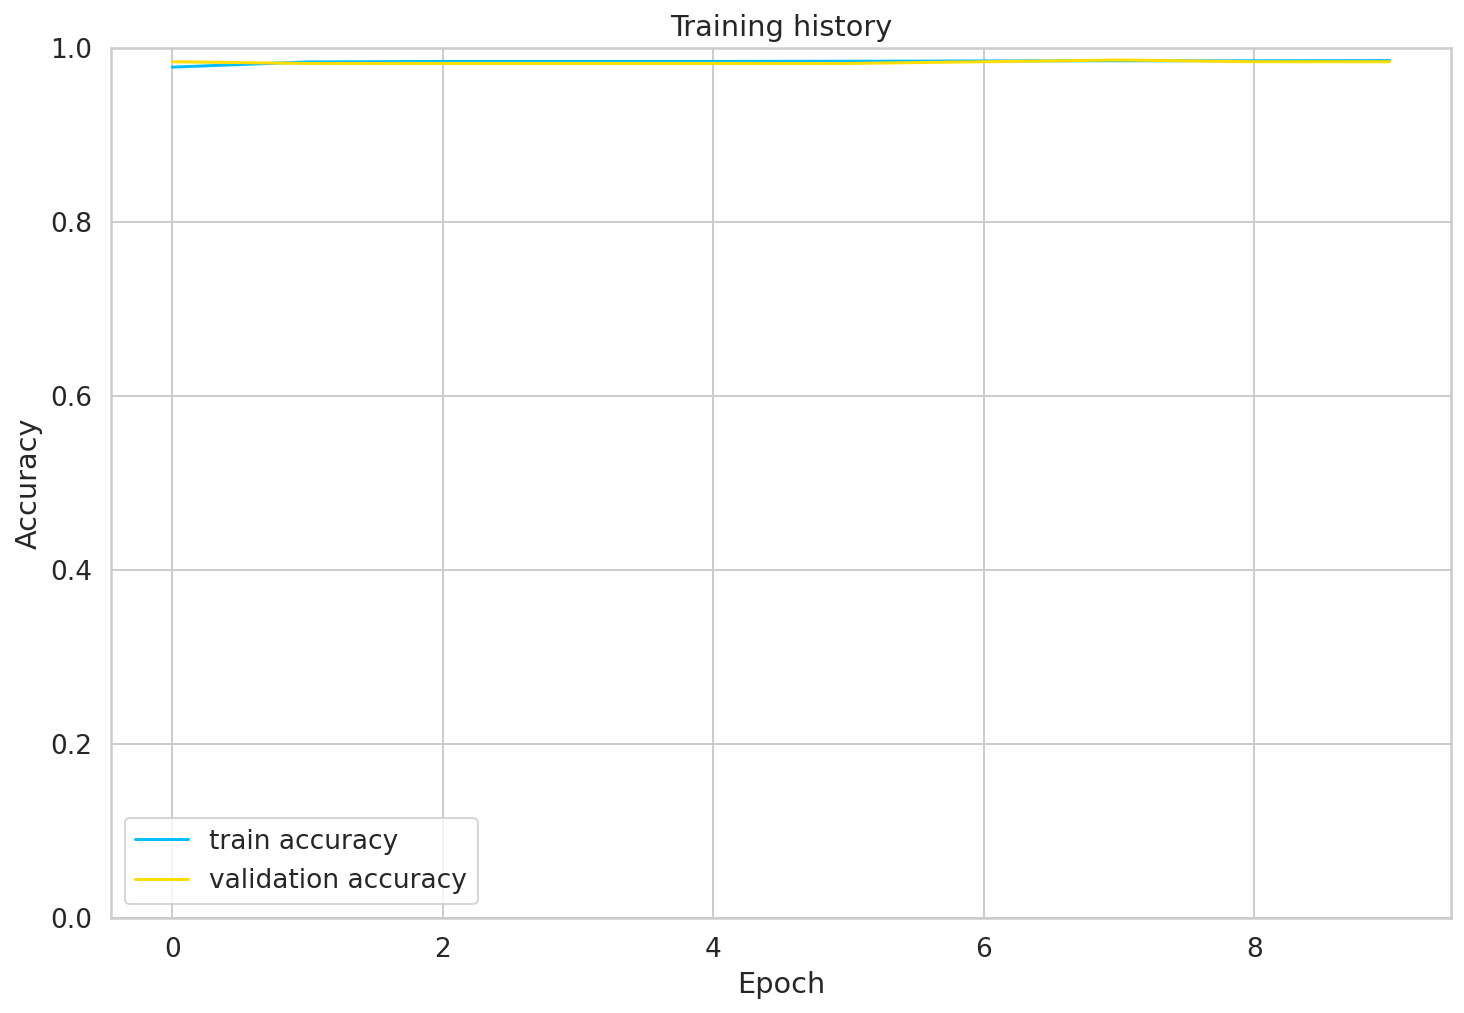

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

0.9920159680638722

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      x = d["x"].to(device)

      outputs = model(
        x=x,
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return predictions, prediction_probs, real_values

In [ ]:
y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

In [ ]:
class_names = ['not bot', 'bot']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     not bot       0.99      1.00      1.00       450
         bot       1.00      0.92      0.96        51

    accuracy                           0.99       501
   macro avg       1.00      0.96      0.98       501
weighted avg       0.99      0.99      0.99       501



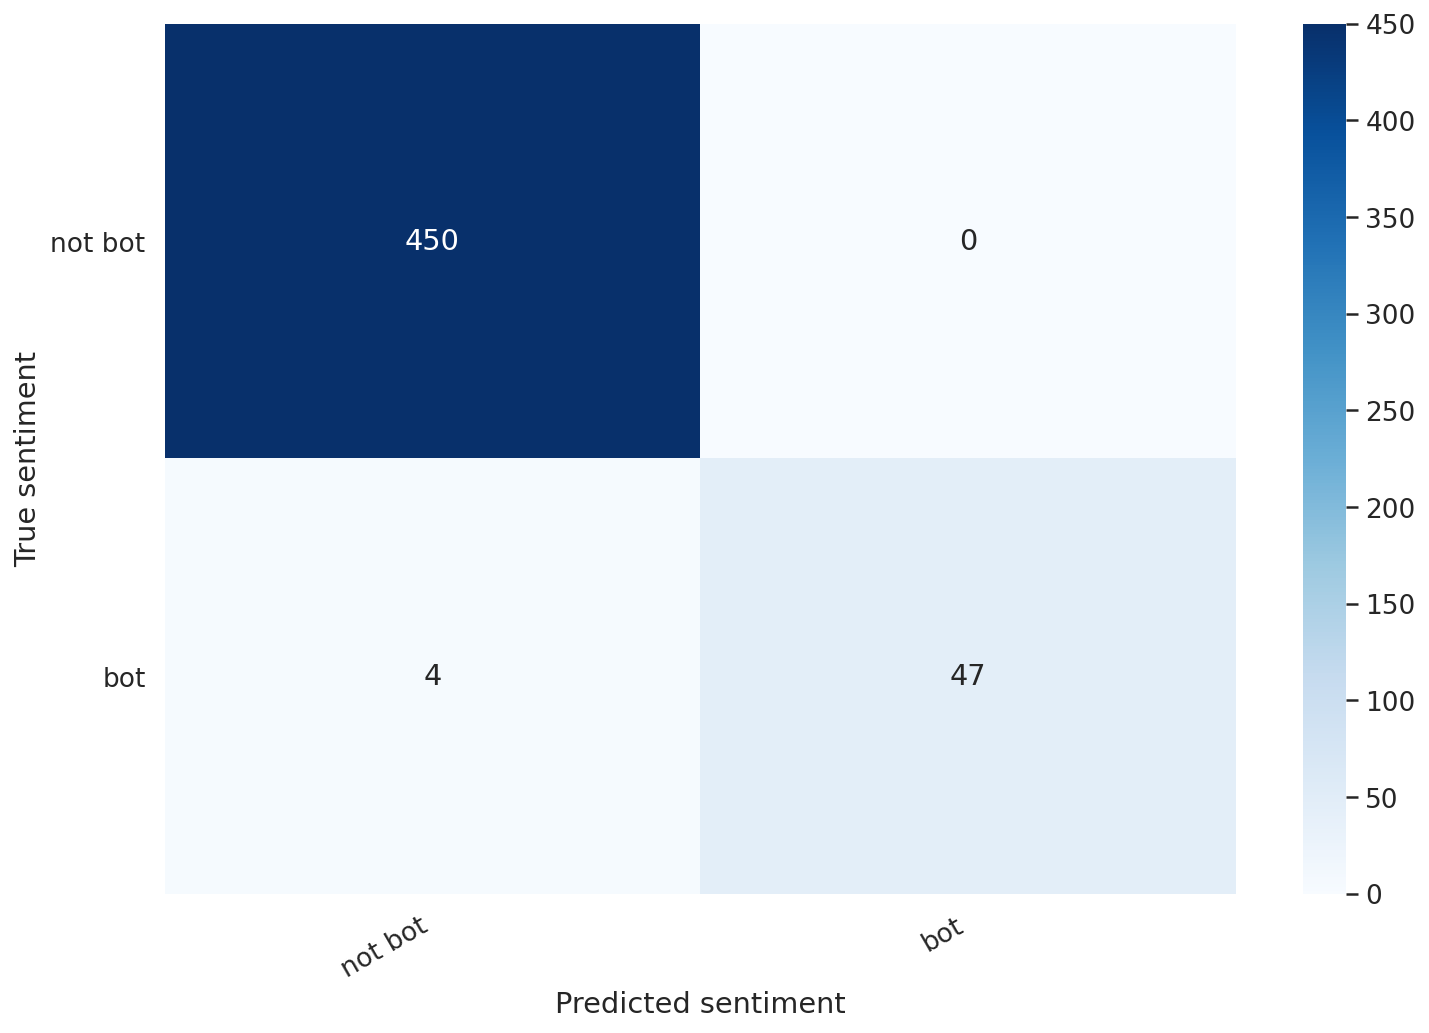

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)